# LSST Air Transparency for a pure molecular absorbing sky

## Use the realistic sky

He we vary the ozone and H2O absorption according AIRS instrument measurements on-board AQUA

- author Sylvie Dagoret-Campagne
- creation date 22  November 2016


In [2]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas as pd
import os
import re

In [28]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Defines where the LibRadTran files are

In [5]:
currentpath=os.getcwd()
rootpath_2016_01='../simulations/RT/2.0/LS/pp/us/ab/rt/y2016/m01/out/'


### Build the list of the files

In [6]:
filelistrootpath_2016_01=os.listdir(rootpath_2016_01) 


### Make a sublist of the files for sky january 2016

In [9]:
filelist_2016_01= []
for filename in filelistrootpath_2016_01:
    if re.search('z10',filename):  #example of filename filter
        filelist_2016_01.append(filename)

In [18]:
filelist_2016_01

['RT_LS_pp_us_ab_rt_z10_y2016_m01_aver.OUT',
 'RT_LS_pp_us_ab_rt_z10_y2016_m01_max.OUT',
 'RT_LS_pp_us_ab_rt_z10_y2016_m01_min.OUT',
 'RT_LS_pp_us_ab_rt_z10_y2016_m01_std1.OUT',
 'RT_LS_pp_us_ab_rt_z10_y2016_m01_std2.OUT']

### ### Show the air transparences for sky afglsw

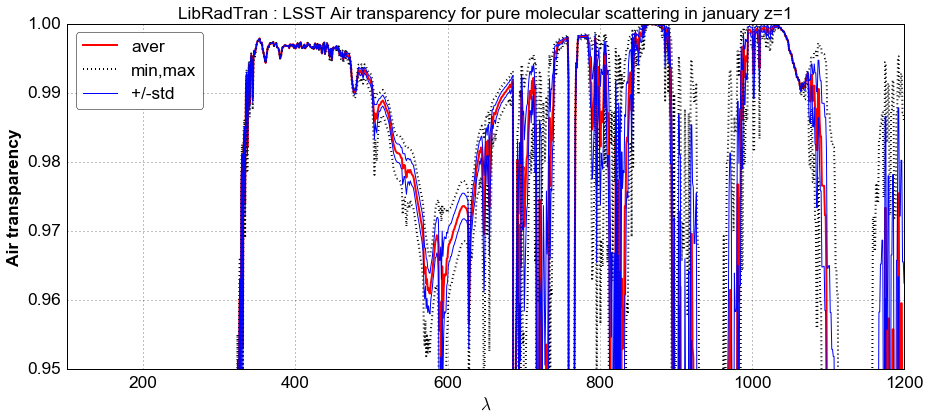

In [51]:
idx=0
flagminmax=False
flagstd=False
for filename in filelist_2016_01:
    fullpath=os.path.join(rootpath_2016_01,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    
    if idx==0:
        plt.plot(x,y,'r-',linewidth=2,label='aver')
    elif idx==3 or idx==4:
        if not flagstd:
            plt.plot(x,y,'b-',linewidth=1,label='+/-std')
            flagstd=True
        else:
            plt.plot(x,y,'b-',linewidth=1)
    else:
        if not flagminmax:
            plt.plot(x,y,'k:',linewidth=2,label='min,max')
            flagminmax=True
        else:
            plt.plot(x,y,'k:',linewidth=2)
            
    
    idx=idx+1
    
plt.xlim(100,1200)
plt.ylim(0.95,1)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency')  
plt.legend(loc='best')
plt.title('LibRadTran : LSST Air transparency for pure molecular scattering in january z=1')

## whole vertical scale

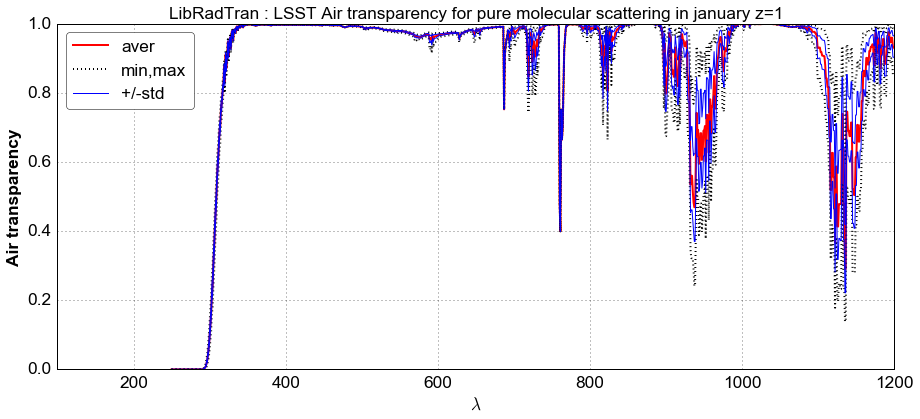

In [52]:
idx=0
flagminmax=False
flagstd=False
for filename in filelist_2016_01:
    fullpath=os.path.join(rootpath_2016_01,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    if idx==0:
        plt.plot(x,y,'r-',linewidth=2,label='aver')
    elif idx==3 or idx==4:
        if not flagstd:
            plt.plot(x,y,'b-',linewidth=1,label='+/-std')
            flagstd=True
        else:
            plt.plot(x,y,'b-',linewidth=1)
    else:
        if not flagminmax:
            plt.plot(x,y,'k:',linewidth=2,label='min,max')
            flagminmax=True
        else:
            plt.plot(x,y,'k:',linewidth=2)
    
    idx=idx+1
    
plt.xlim(100,1200)
plt.ylim(0,1)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency')  
plt.legend(loc='best')
plt.title('LibRadTran : LSST Air transparency for pure molecular scattering in january z=1')

In [55]:
rootpath='../simulations/RT/2.0/LS/pp/us/ab/rt/y2016'

In [56]:
months=['01','02','03','04','05','06','07','08','09','10']

In [66]:
selectedfiles = []
for imonth in months:
    path=rootpath+'/m'+imonth+'/out'
    filelistrootpath=os.listdir(path) 
    for filename in filelistrootpath:
        if re.search('z10',filename) and re.search('aver',filename):  #example of filename filter
            fullfilename=os.path.join(path,filename)
            selectedfiles.append(fullfilename) 

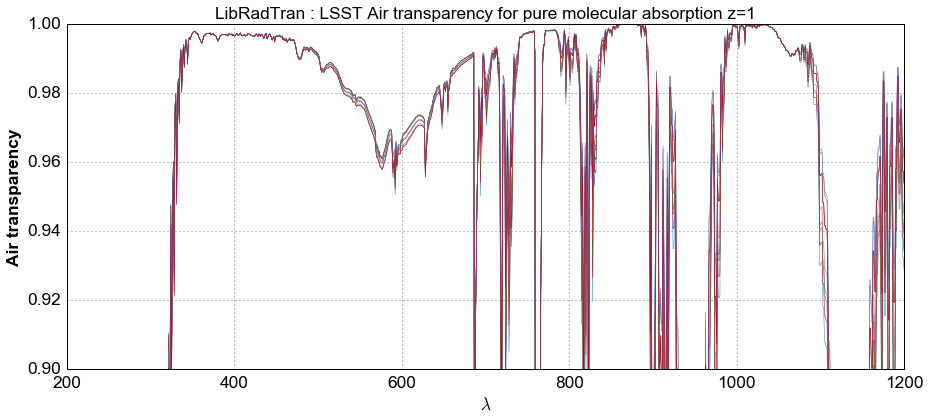

In [78]:
for filename in selectedfiles:
    data = np.loadtxt(filename)
    x=data[:,0]
    y=data[:,1]    
    plt.plot(x,y,'-',linewidth=0.5)

    
plt.xlim(200,1200)
plt.ylim(0.9,1)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency')  
#plt.legend(loc='best')
plt.title('LibRadTran : LSST Air transparency for pure molecular absorption z=1')